## Import Library

In [75]:
import pandas as pd
from darts import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
from darts.metrics.metrics import mape
from darts.metrics.metrics import mae
from darts.metrics.metrics import rmse

In [76]:
df =pd.read_csv('./forecast_gmv_06_12_2024.csv')
df.head()

date       gmv  quantity  total_male  total_female  total_unknown  \
0  2024-06-12   46898.0       267           9            18              1   
1  2024-06-11  213466.0      1410          26            99              7   
2  2024-06-10  171892.0      1072          18            80             15   
3  2024-06-09  173227.0       945          24            82              9   
4  2024-06-08  177293.0      1128          26            83             15   

   total_order  
0           28  
1          132  
2          113  
3          115  
4          124

In [77]:
# Update gmv each day after query

new_rows = pd.DataFrame({
    'date': [pd.to_datetime('2024-06-13'), pd.to_datetime('2024-06-14'), pd.to_datetime('2024-06-15'), pd.to_datetime('2024-06-16'), pd.to_datetime('2024-06-17'), pd.to_datetime('2024-06-18'),
             pd.to_datetime('2024-06-19'), pd.to_datetime('2024-06-20'), pd.to_datetime('2024-06-21'), pd.to_datetime('2024-06-22'), pd.to_datetime('2024-06-23'), pd.to_datetime('2024-06-24'),
             pd.to_datetime('2024-06-25'),pd.to_datetime('2024-06-26'),pd.to_datetime('2024-06-27'),pd.to_datetime('2024-06-28'),pd.to_datetime('2024-06-29'),pd.to_datetime('2024-06-30'),pd.to_datetime('2024-07-01'),
             pd.to_datetime('2024-07-02'), pd.to_datetime('2024-07-03')
             ],
    'gmv': [211619, 210396, 232173, 208262, 162534, 200252, 208692, 190115, 232990, 207749, 196004, 229341, 225226 ,246038, 214500 , 218507, 193665, 242967, 218320,229796 ,251898]
})
df['gmv'][df['date'] == '2024-06-12'] = 212833

# Add the new rows using concat
df = pd.concat([df, new_rows], ignore_index=True)

C:\Users\guide\AppData\Local\Temp\ipykernel_27344\855424015.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmv'][df['date'] == '2024-06-12'] = 212833


<Axes: >

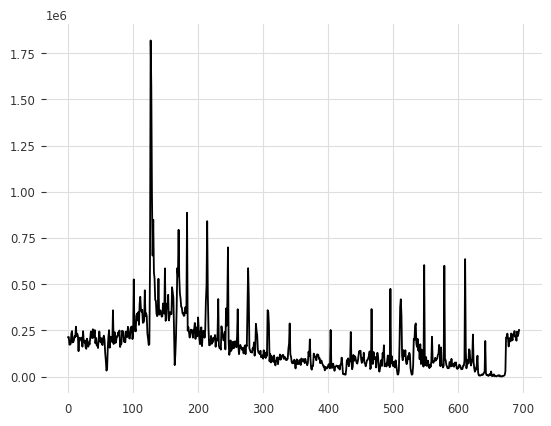

In [78]:
df['gmv'].plot()

## Data Cleaning

### Convert Data Types

In [79]:
#Covert data types
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df[(df['date'] >= '2023-01-01') & (df['date'] <= '2024-07-04')]
df.shape

(550, 7)

<Axes: >

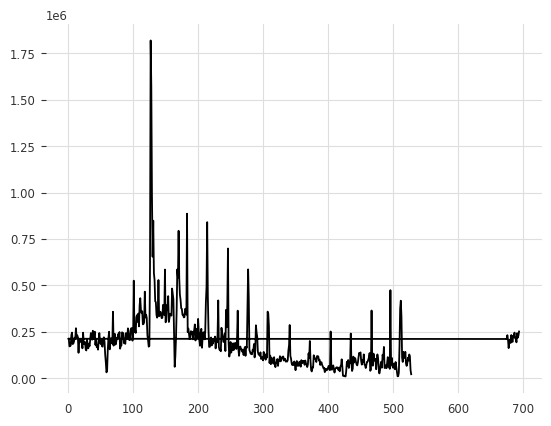

In [80]:
df['gmv'].plot()

In [81]:
df.sort_values(by="date").tail()

date       gmv  quantity  total_male  total_female  total_unknown  \
690 2024-06-29  193665.0       NaN         NaN           NaN            NaN   
691 2024-06-30  242967.0       NaN         NaN           NaN            NaN   
692 2024-07-01  218320.0       NaN         NaN           NaN            NaN   
693 2024-07-02  229796.0       NaN         NaN           NaN            NaN   
694 2024-07-03  251898.0       NaN         NaN           NaN            NaN   

     total_order  
690          NaN  
691          NaN  
692          NaN  
693          NaN  
694          NaN

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 528 to 694
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           550 non-null    datetime64[ns]
 1   gmv            550 non-null    float64       
 2   quantity       529 non-null    float64       
 3   total_male     529 non-null    float64       
 4   total_female   529 non-null    float64       
 5   total_unknown  529 non-null    float64       
 6   total_order    529 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 34.4 KB


In [83]:
# Function to replace outliers with the mean of the rest of the values

from scipy.stats import zscore
df1 = df.copy()


def replace_outliers_with_mean(df, column_name):
    # Calculate Z-scores
    z_scores = zscore(df[column_name])
    
    # Identify outliers (using a threshold of 3 for Z-score)
    outliers = np.abs(z_scores) > 3
    
    # Calculate mean of non-outliers
    mean_non_outliers = df.loc[~outliers, column_name].mean()
    
    # Replace outliers with the mean of non-outliers
    df.loc[outliers, column_name] = mean_non_outliers
    
    return df

# Replace outliers in 'gmv' column
df = replace_outliers_with_mean(df, 'gmv')

# Display the DataFrame
df[['date', 'gmv']][df['date'] == '2024-06-05']

date       gmv
7 2024-06-05  184519.0

In [84]:
# Display the DataFrame
df.iloc[120:140]

date       gmv  quantity  total_male  total_female  total_unknown  \
408 2023-05-01   69566.0     332.0         8.0          46.0            4.0   
407 2023-05-02   56682.0     352.0         7.0          53.0            1.0   
406 2023-05-03   45897.0     379.0        13.0          33.0            9.0   
405 2023-05-04   72825.0     549.0        20.0          52.0           13.0   
404 2023-05-05  251708.0    2418.0        44.0         230.0           25.0   
403 2023-05-06   43861.0     203.0        13.0          31.0            3.0   
402 2023-05-07   48830.0     282.0         9.0          40.0            3.0   
401 2023-05-08   66842.0     400.0        14.0          42.0            7.0   
400 2023-05-09   57202.0     263.0        10.0          37.0            7.0   
399 2023-05-10   48127.0     272.0         8.0          36.0            2.0   
398 2023-05-11   42875.0     348.0         8.0          34.0            1.0   
397 2023-05-12   49594.0     253.0         7.0          32.0            2.0   
396 2023-05-13   51496.0     409.0         9.0          39.0            2.0   
395 2023-05-14   33290.0     285.0         2.0          27.0            4.0   
394 2023-05-15   56011.0     457.0         9.0          51.0            3.0   
393 2023-05-16   53594.0     304.0         6.0          43.0            3.0   
392 2023-05-17   63983.0     404.0        14.0          42.0            4.0   
391 2023-05-18   70804.0     496.0        14.0          52.0            8.0   
390 2023-05-19   85876.0     618.0        15.0          61.0            4.0   
389 2023-05-20   86723.0     571.0        21.0          56.0            3.0   

     total_order  
408         57.0  
407         61.0  
406         55.0  
405         85.0  
404        298.0  
403         47.0  
402         52.0  
401         63.0  
400         54.0  
399         46.0  
398         43.0  
397         41.0  
396         50.0  
395         33.0  
394         63.0  
393         52.0  
392         60.0  
391         74.0  
390         80.0  
389         80.0

In [85]:
df.tail()

date       gmv  quantity  total_male  total_female  total_unknown  \
690 2024-06-29  193665.0       NaN         NaN           NaN            NaN   
691 2024-06-30  242967.0       NaN         NaN           NaN            NaN   
692 2024-07-01  218320.0       NaN         NaN           NaN            NaN   
693 2024-07-02  229796.0       NaN         NaN           NaN            NaN   
694 2024-07-03  251898.0       NaN         NaN           NaN            NaN   

     total_order  
690          NaN  
691          NaN  
692          NaN  
693          NaN  
694          NaN

In [86]:
# เช็ค Null
df.isnull().sum()

date              0
gmv               0
quantity         21
total_male       21
total_female     21
total_unknown    21
total_order      21
dtype: int64

In [87]:
# เช็ค 0s
df.eq(0).sum()

date             0
gmv              0
quantity         0
total_male       2
total_female     0
total_unknown    8
total_order      0
dtype: int64

In [88]:
# แทนที่ null ด้วยค่าเฉลี่ย
df.fillna(df.mean(), inplace=True)

In [89]:
# เช็ค Null อีกรอบ
df.isnull().sum()

date             0
gmv              0
quantity         0
total_male       0
total_female     0
total_unknown    0
total_order      0
dtype: int64

## Feature Engineering

Extract ข้อมูลที่มีอยู่เป็นอีก Feature เพื่อเพิ่มความละเอียด

In [90]:
df['Quarter'] = df['date'].dt.quarter
df['Month'] = df['date'].dt.month
df['Weekday'] = df['date'].dt.weekday + 1  # Adding 1 to make it 1-7 (Mon-Sun)
df['Dayofyear'] = df['date'].dt.dayofyear
df['double_date'] = df['date'].apply(lambda x: 1 if x.month == x.day else 0)
df['mid_month'] = df['date'].apply(lambda x: 1 if x.day == 15 else 0)
df['payday'] = df['date'].apply(lambda x: 1 if x.day>=25 else 0)

In [91]:
date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')

# Create a DataFrame with the date range
df2 = pd.DataFrame(date_range, columns=['date'])

# Feature engineering from Date
df2['Quarter'] = df2['date'].dt.quarter
df2['Month'] = df2['date'].dt.month
df2['Weekday'] = df2['date'].dt.weekday + 1  # Adding 1 to make it 1-7 (Mon-Sun)
df2['Dayofyear'] = df2['date'].dt.dayofyear
df2['double_date'] = df['date'].apply(lambda x: 1 if x.month == x.day else 0)
df2['mid_month'] = df['date'].apply(lambda x: 1 if x.day == 15 else 0)
df2['payday'] = df['date'].apply(lambda x: 1 if x.day>=25 else 0)

In [92]:
# df2 = df2[(df2['date'] <= '2024-06-17')]

In [93]:
df2.tail()

date  Quarter  Month  Weekday  Dayofyear  double_date  mid_month  \
726 2024-12-27        4     12        5        362          NaN        NaN   
727 2024-12-28        4     12        6        363          NaN        NaN   
728 2024-12-29        4     12        7        364          NaN        NaN   
729 2024-12-30        4     12        1        365          NaN        NaN   
730 2024-12-31        4     12        2        366          NaN        NaN   

     payday  
726     NaN  
727     NaN  
728     NaN  
729     NaN  
730     NaN

In [94]:
df.sort_values(by=['gmv'])

date       gmv  quantity  total_male  total_female  total_unknown  \
427 2023-04-12    9831.0      27.0         0.0           8.0            4.0   
507 2023-01-22   10931.0      90.0         0.0          12.0            0.0   
425 2023-04-14   11022.0      15.0         2.0           6.0            3.0   
508 2023-01-21   11231.0     128.0         2.0           7.0            1.0   
424 2023-04-15   13138.0      62.0         1.0          11.0            4.0   
..         ...       ...       ...         ...           ...            ...   
149 2024-01-15  585196.0    2892.0        91.0         315.0           34.0   
277 2023-09-09  586269.0    4480.0       108.0         452.0           39.0   
168 2023-12-27  586451.0    2605.0        76.0         294.0           24.0   
126 2024-02-07  601441.0    2961.0        80.0         357.0           29.0   
130 2024-02-03  654623.0    3099.0        98.0         387.0           30.0   

     total_order  Quarter  Month  Weekday  Dayofyear  double_date  mid_month  \
427         12.0        2      4        3        102            0          0   
507         12.0        1      1        7         22            0          0   
425         11.0        2      4        5        104            0          0   
508         10.0        1      1        6         21            0          0   
424         16.0        2      4        6        105            0          1   
..           ...      ...    ...      ...        ...          ...        ...   
149        440.0        1      1        1         15            0          1   
277        598.0        3      9        6        252            1          0   
168        395.0        4     12        3        361            0          0   
126        466.0        1      2        3         38            0          0   
130        515.0        1      2        6         34            0          0   

     payday  
427       0  
507       0  
425       0  
508       0  
424       0  
..      ...  
149       0  
277       0  
168       1  
126       0  
130       0  

[550 rows x 14 columns]

In [95]:
df.sort_values(by=['date'])

date       gmv     quantity  total_male  total_female  \
528 2023-01-01   22043.0    57.000000    2.000000     13.000000   
527 2023-01-02   44196.0   121.000000    3.000000     29.000000   
526 2023-01-03  118732.0   446.000000   13.000000     72.000000   
525 2023-01-04  128362.0   408.000000    9.000000     54.000000   
524 2023-01-05   95443.0   356.000000   10.000000     50.000000   
..         ...       ...          ...         ...           ...   
690 2024-06-29  193665.0  1173.249527   28.693762    114.697543   
691 2024-06-30  242967.0  1173.249527   28.693762    114.697543   
692 2024-07-01  218320.0  1173.249527   28.693762    114.697543   
693 2024-07-02  229796.0  1173.249527   28.693762    114.697543   
694 2024-07-03  251898.0  1173.249527   28.693762    114.697543   

     total_unknown  total_order  Quarter  Month  Weekday  Dayofyear  \
528       0.000000    15.000000        1      1        7          1   
527       0.000000    32.000000        1      1        1          2   
526       4.000000    89.000000        1      1        2          3   
525      10.000000    73.000000        1      1        3          4   
524       7.000000    67.000000        1      1        4          5   
..             ...          ...      ...    ...      ...        ...   
690      11.083176   154.228733        2      6        6        181   
691      11.083176   154.228733        2      6        7        182   
692      11.083176   154.228733        3      7        1        183   
693      11.083176   154.228733        3      7        2        184   
694      11.083176   154.228733        3      7        3        185   

     double_date  mid_month  payday  
528            1          0       0  
527            0          0       0  
526            0          0       0  
525            0          0       0  
524            0          0       0  
..           ...        ...     ...  
690            0          0       1  
691            0          0       1  
692            0          0       0  
693            0          0       0  
694            0          0       0  

[550 rows x 14 columns]

### Convert to TimeSeries Data from Darts Library

In [96]:
data_ts = TimeSeries.from_dataframe(df, time_col="date")
# data_ts2 = TimeSeries.from_dataframe(df1, time_col="date")
# future_cov = TimeSeries.from_dataframe(df2, 'date', ['double_date', 'mid_month', 'payday'])
# future_cov = TimeSeries.from_dataframe(df2, 'date', ['Quarter',	'Month','Weekday','Dayofyear'])
# future_cov = TimeSeries.from_dataframe(df2, 'date', ['Month','Weekday','Dayofyear'])
# future_cov = TimeSeries.from_dataframe(df2, 'date', ['double_date'])
future_cov = TimeSeries.from_dataframe(df2, 'date', ['Weekday','Dayofyear','payday'])
# future_cov = TimeSeries.from_dataframe(df2, 'date', ['Quarter',	'Month','Weekday','Dayofyear','double_date', 'mid_month', 'payday'])


In [97]:
from darts.utils.missing_values import fill_missing_values
future_cov = fill_missing_values(future_cov, fill='auto')

### Scaler

ทำ MinMax Scaler เพื่อทำให้ข้อมูลมีค่าอยู่แค่ระหว่าง 0-1

In [98]:
from darts.dataprocessing.transformers import Scaler

scaler_gmv = Scaler()
scaler_cov = Scaler()

rescaled = scaler_gmv.fit_transform(data_ts['gmv'])
future_cov = scaler_cov.fit_transform(future_cov)
future_cov

<TimeSeries (DataArray) (date: 731, component: 3, sample: 1)>
array([[[1.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.00273973],
        [0.        ]],

       [[0.16666667],
        [0.00547945],
        [0.        ]],

       ...,

       [[1.        ],
        [0.99452055],
        [0.        ]],

       [[0.        ],
        [0.99726027],
        [0.        ]],

       [[0.16666667],
        [1.        ],
        [0.        ]]])
Coordinates:
  * date       (date) datetime64[ns] 2023-01-01 2023-01-02 ... 2024-12-31
  * component  (component) object 'Weekday' 'Dayofyear' 'payday'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

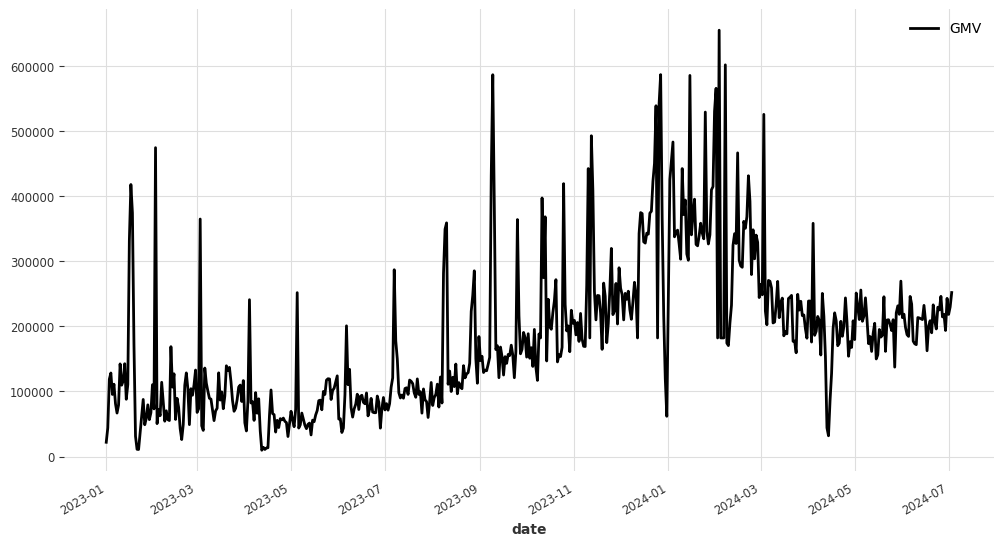

In [99]:
plt.figure(figsize=(12, 6))
# rescaled['gmv'].plot(label='original')
data_ts['gmv'].plot(label='GMV')
plt.legend()
plt.show()

In [100]:
df.corr()

date       gmv  quantity  total_male  total_female  \
date           1.000000  0.548398  0.430676    0.461895      0.337713   
gmv            0.548398  1.000000  0.719256    0.764257      0.725816   
quantity       0.430676  0.719256  1.000000    0.930850      0.961630   
total_male     0.461895  0.764257  0.930850    1.000000      0.945654   
total_female   0.337713  0.725816  0.961630    0.945654      1.000000   
total_unknown  0.334527  0.664508  0.911933    0.883689      0.927594   
total_order    0.366609  0.738539  0.965036    0.964380      0.997526   
Quarter        0.138087  0.080344  0.157324    0.000409      0.061521   
Month          0.169882  0.088319  0.164230    0.005704      0.064892   
Weekday       -0.001592 -0.060747 -0.051867   -0.028565     -0.059966   
Dayofyear      0.175314  0.091108  0.160880    0.002727      0.060117   
double_date   -0.013967  0.159338  0.363335    0.295246      0.360375   
mid_month     -0.002961  0.011780 -0.012412    0.010966     -0.005854   
payday         0.038396  0.023031  0.005754   -0.027619     -0.036441   

               total_unknown  total_order   Quarter     Month   Weekday  \
date                0.334527     0.366609  0.138087  0.169882 -0.001592   
gmv                 0.664508     0.738539  0.080344  0.088319 -0.060747   
quantity            0.911933     0.965036  0.157324  0.164230 -0.051867   
total_male          0.883689     0.964380  0.000409  0.005704 -0.028565   
total_female        0.927594     0.997526  0.061521  0.064892 -0.059966   
total_unknown       1.000000     0.936594  0.078138  0.084893 -0.056779   
total_order         0.936594     1.000000  0.052454  0.056495 -0.054706   
Quarter             0.078138     0.052454  1.000000  0.968622  0.003856   
Month               0.084893     0.056495  0.968622  1.000000  0.013363   
Weekday            -0.056779    -0.054706  0.003856  0.013363  1.000000   
Dayofyear           0.080819     0.052080  0.964875  0.996149  0.013913   
double_date         0.374581     0.352838 -0.001985 -0.001520  0.020906   
mid_month          -0.007969    -0.002698 -0.001985 -0.001520  0.000501   
payday             -0.026836    -0.034413  0.010511  0.009977 -0.003064   

               Dayofyear  double_date  mid_month    payday  
date            0.175314    -0.013967  -0.002961  0.038396  
gmv             0.091108     0.159338   0.011780  0.023031  
quantity        0.160880     0.363335  -0.012412  0.005754  
total_male      0.002727     0.295246   0.010966 -0.027619  
total_female    0.060117     0.360375  -0.005854 -0.036441  
total_unknown   0.080819     0.374581  -0.007969 -0.026836  
total_order     0.052080     0.352838  -0.002698 -0.034413  
Quarter         0.964875    -0.001985  -0.001985  0.010511  
Month           0.996149    -0.001520  -0.001520  0.009977  
Weekday         0.013913     0.020906   0.000501 -0.003064  
Dayofyear       1.000000    -0.020006  -0.002648  0.071607  
double_date    -0.020006     1.000000  -0.033835 -0.094577  
mid_month      -0.002648    -0.033835   1.000000 -0.094577  
payday          0.071607    -0.094577  -0.094577  1.000000

### เช็คว่า ข้อมูลเป็น Stationary หรือไม่โดยใช้ Adfuller

In [101]:
from statsmodels.tsa.stattools import adfuller




# Check stationarity with Augmented Dickey-Fuller test
result = adfuller(df['gmv'])

# Log transformation
log_data = np.log(df['gmv'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.130977668497254
p-value: 0.702561636600658


In [102]:
df = df.drop(columns=['quantity', 'total_male', 'total_female', 'total_unknown', 'total_order'],axis=1)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 528 to 694
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         550 non-null    datetime64[ns]
 1   gmv          550 non-null    float64       
 2   Quarter      550 non-null    int32         
 3   Month        550 non-null    int32         
 4   Weekday      550 non-null    int32         
 5   Dayofyear    550 non-null    int32         
 6   double_date  550 non-null    int64         
 7   mid_month    550 non-null    int64         
 8   payday       550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3)
memory usage: 50.5 KB


In [104]:
df.shape

(550, 9)

In [105]:
training_ori, validation_ori = data_ts.split_after(0.8)

training, validation = rescaled.split_before(0.8)
target = training['gmv']
# features = df.drop(columns=['gmv'], axis=1)
# past_cov = TimeSeries.from_dataframe(features,time_col="date")
# past_cov = data_ts['quantity']

# future_cov = TimeSeries.from_dataframe(df2, 'date', ['Quarter',	'Month','Weekday','Dayofyear','double_date', 'mid_month', 'payday'])

# Select multiple past covariate columns
# past_cov = TimeSeries.from_dataframe(df, 'date', ['quantity', 'total_female', 'total_order',])


# train_past_cov, val_past_cov = past_cov.split_after(0.8)

### ก่อนใช้ ARIMA ต้องมีการเช็คค่า ACF และ PACF ในแต่ละ lags 

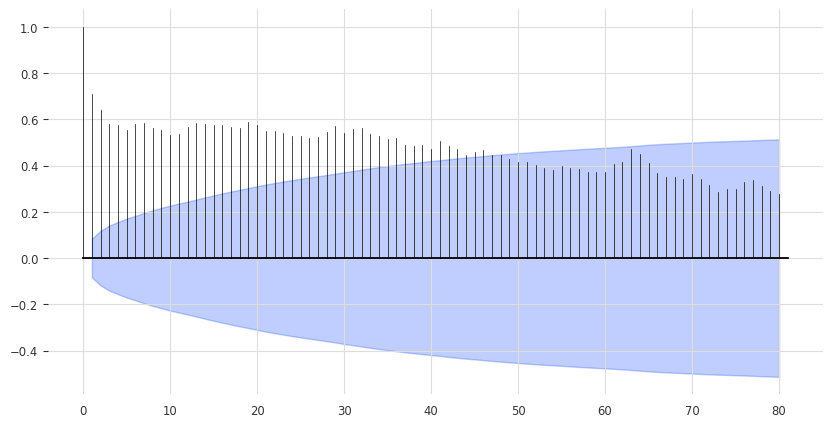

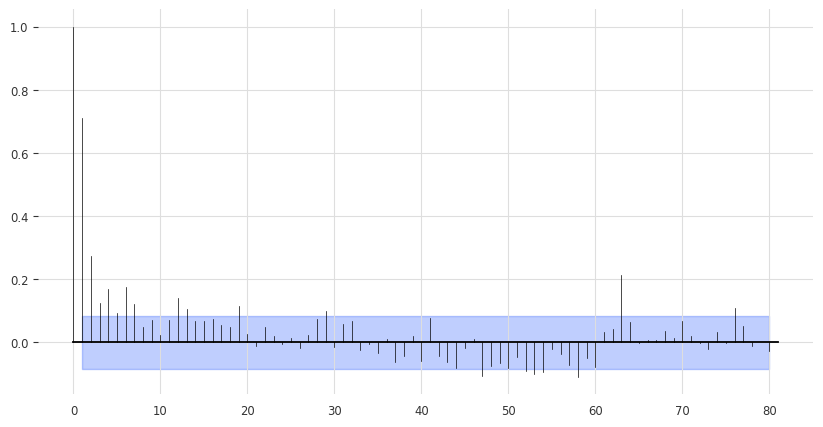

In [106]:
from darts.utils.statistics import plot_acf, plot_pacf
acf = plot_acf(rescaled['gmv'], max_lag=80)
pacf =plot_pacf(rescaled['gmv'], max_lag=80)


### Make data from Stationary to Non-Stationary

In [107]:
# สมมติว่ามี DataFrame ชื่อ data ที่มีคอลัมน์ 'value'
df['gmv_diff'] = df['gmv'].diff().diff()
df = df.dropna().reset_index(drop=True)

In [108]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['gmv_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -11.777992
p-value: 0.000000


<Axes: >

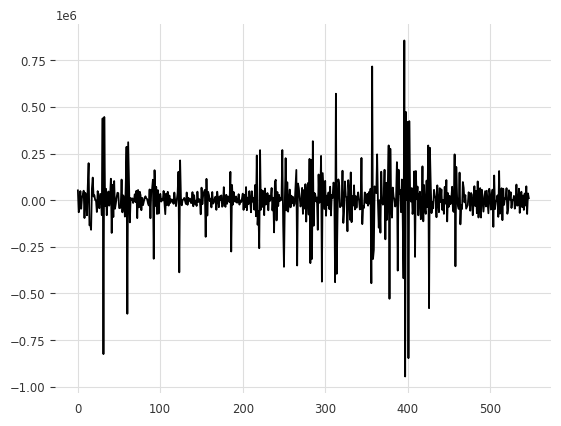

In [109]:
df['gmv_diff'].plot()

## Evaluation

ทำโดยการใช้ Historical Forecast เป็นฟังก์ชันของ Darts Library 

จุดประสงค์หลักของการใช้ Historical Forecast คือการทำความเข้าใจว่าโมเดลเราจะทำนายค่าในอนาคตได้อย่างไรในจุดเวลาต่าง ๆ ในอดีต ซึ่งจะช่วยให้เราทราบถึงความสม่ำเสมอและความน่าเชื่อถือ

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklear

  0%|          | 0/111 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklear

  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\guide\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\guide\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\guide\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


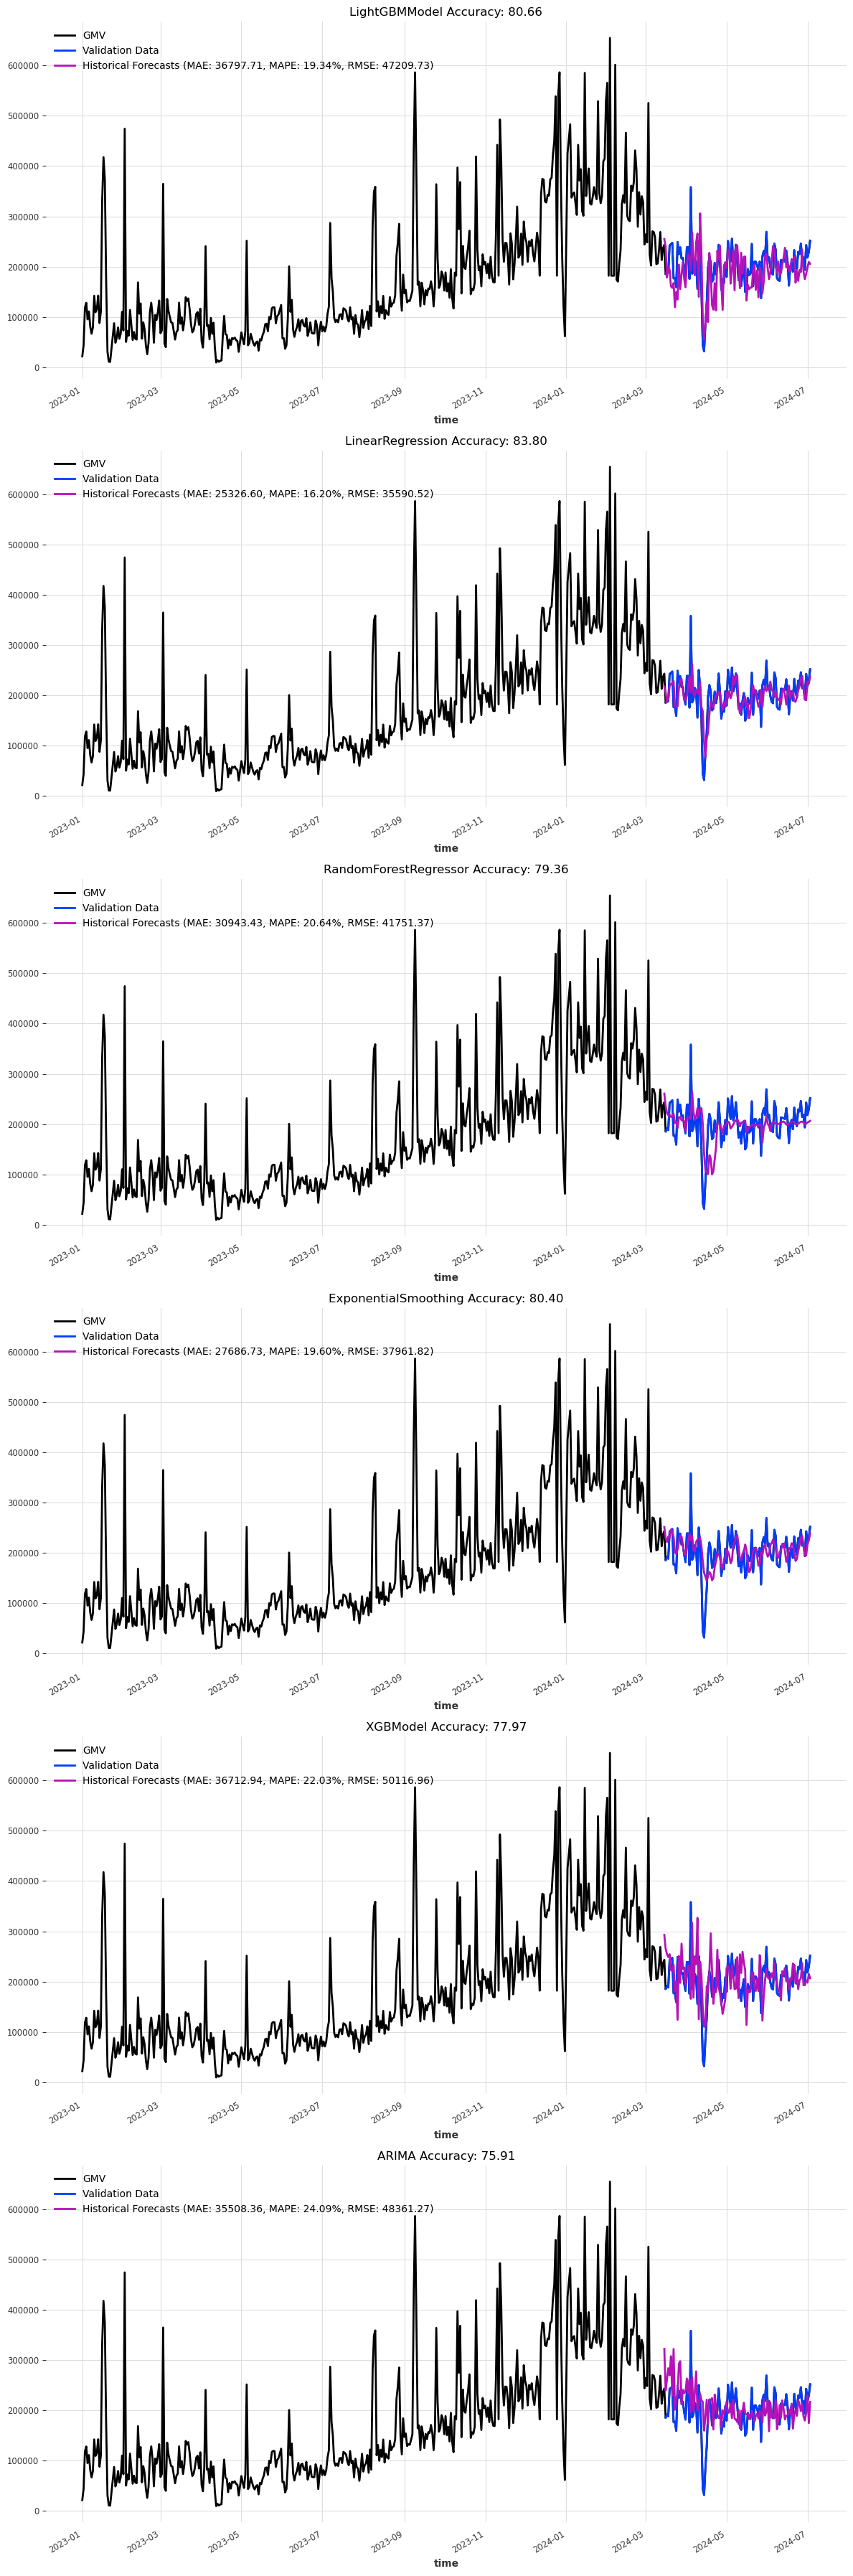

In [34]:
from darts.models.forecasting.catboost_model import CatBoostModel
from darts.models.forecasting.lgbm import LightGBMModel
from sklearn.ensemble import RandomForestRegressor
from darts.models.forecasting.regression_model import RegressionModel
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
from darts.models.forecasting.random_forest import RandomForest
from sklearn.linear_model import LinearRegression
from darts.models.forecasting.xgboost import XGBModel
from darts.utils.utils import ModelMode, SeasonalityMode
from darts.models.forecasting.arima import ARIMA
from sklearn.linear_model import ElasticNetCV

# List of models configurations
models = [
    LightGBMModel(random_state=42, lags=7, lags_future_covariates=(0,7), output_chunk_length=7,show_warnings=False,verbose=-1),
    # CatBoostModel(random_state=42, lags=7, output_chunk_length=7, lags_future_covariates=(0,7)),
    RegressionModel(model=LinearRegression() ,lags=3, lags_future_covariates=(0,7),output_chunk_length=7,),
    RegressionModel(model=RandomForestRegressor(max_depth=9, n_estimators=300, random_state=42),lags=7, lags_future_covariates=(0,7),output_chunk_length=7,),
    ExponentialSmoothing(trend=ModelMode.NONE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=7,),
    XGBModel(random_state=42, lags=14, lags_future_covariates=(0,7), output_chunk_length=7, ),
    ARIMA(p=0, d=0, q=1, seasonal_order=(1, 0, 2, 12), trend=None, random_state=42),
        ]
model_name = [  'LightGBMModel',
                'LinearRegression',
                  'RandomForestRegressor',
                    'ExponentialSmoothing', 'XGBModel',
                    'ARIMA'
                  ]
i = 0

# Setting up the plot
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(12, 6 * len(models)))
if len(models) == 1:
    axes = [axes]  # Make axes iterable if there's only one model

# Loop through models and plot each one
for model, ax in zip(models, axes):
    if (i == 3):
        historical_forecasts = model.historical_forecasts(
        series=rescaled['gmv'],
        start=0.8,  # Start generating historical forecasts after 80% of the data
        forecast_horizon=1,  # Forecast horizon (number of steps to forecast)
        stride=1,  # Make a forecast every time step
        retrain=True,  # Retrain the model at each step
        verbose=True,
    )
    else:
    # Generate historical forecasts
        historical_forecasts = model.historical_forecasts(
            series=rescaled['gmv'],
            start=0.8,  # Start generating historical forecasts after 80% of the data
            forecast_horizon=1,  # Forecast horizon (number of steps to forecast)
            stride=1,  # Make a forecast every time step
            retrain=True,  # Retrain the model at each step
            verbose=True,
            future_covariates=future_cov
        )

    # last_known_gmv = df['gmv'].iloc[-1]

    original = scaler_gmv.inverse_transform(historical_forecasts['gmv'])
    # original = historical_forecasts['gmv_diff']
#     original = original.pd_dataframe().reset_index()
#     original.columns = ['date', 'gmv_diff']

#     original['gmv_diff'] = np.cumsum(original['gmv_diff']) + last_known_gmv

#     # Combine Date and Forecast into the final DataFrame
#     forecast_gmv = pd.DataFrame({
#         'date': original['date'],
#         'gmv': original['gmv_diff']
# })
#     forecast_gmv = TimeSeries.from_dataframe(forecast_gmv, time_col="date")

    # Calculate metrics
    hf_mae = mae(validation_ori['gmv'], original)
    hf_mape = mape(validation_ori['gmv'], original)
    hf_rmse = rmse(validation_ori['gmv'], original)

    # Plot the results
    # training['gmv_diff'].plot(label='Actual Data', ax=ax)
    data_ts['gmv'].plot(label='GMV', ax=ax)
    validation_ori['gmv'].plot(label='Validation Data', ax=ax)
    original.plot(label=f'Historical Forecasts (MAE: {hf_mae:.2f}, MAPE: {hf_mape:.2f}%, RMSE: {hf_rmse:.2f})', ax=ax)
    ax.legend()
    ax.set_title(f'{model_name[i]} Accuracy: {100-hf_mape:.2f}')
    i += 1
plt.tight_layout()
plt.show()


`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklear

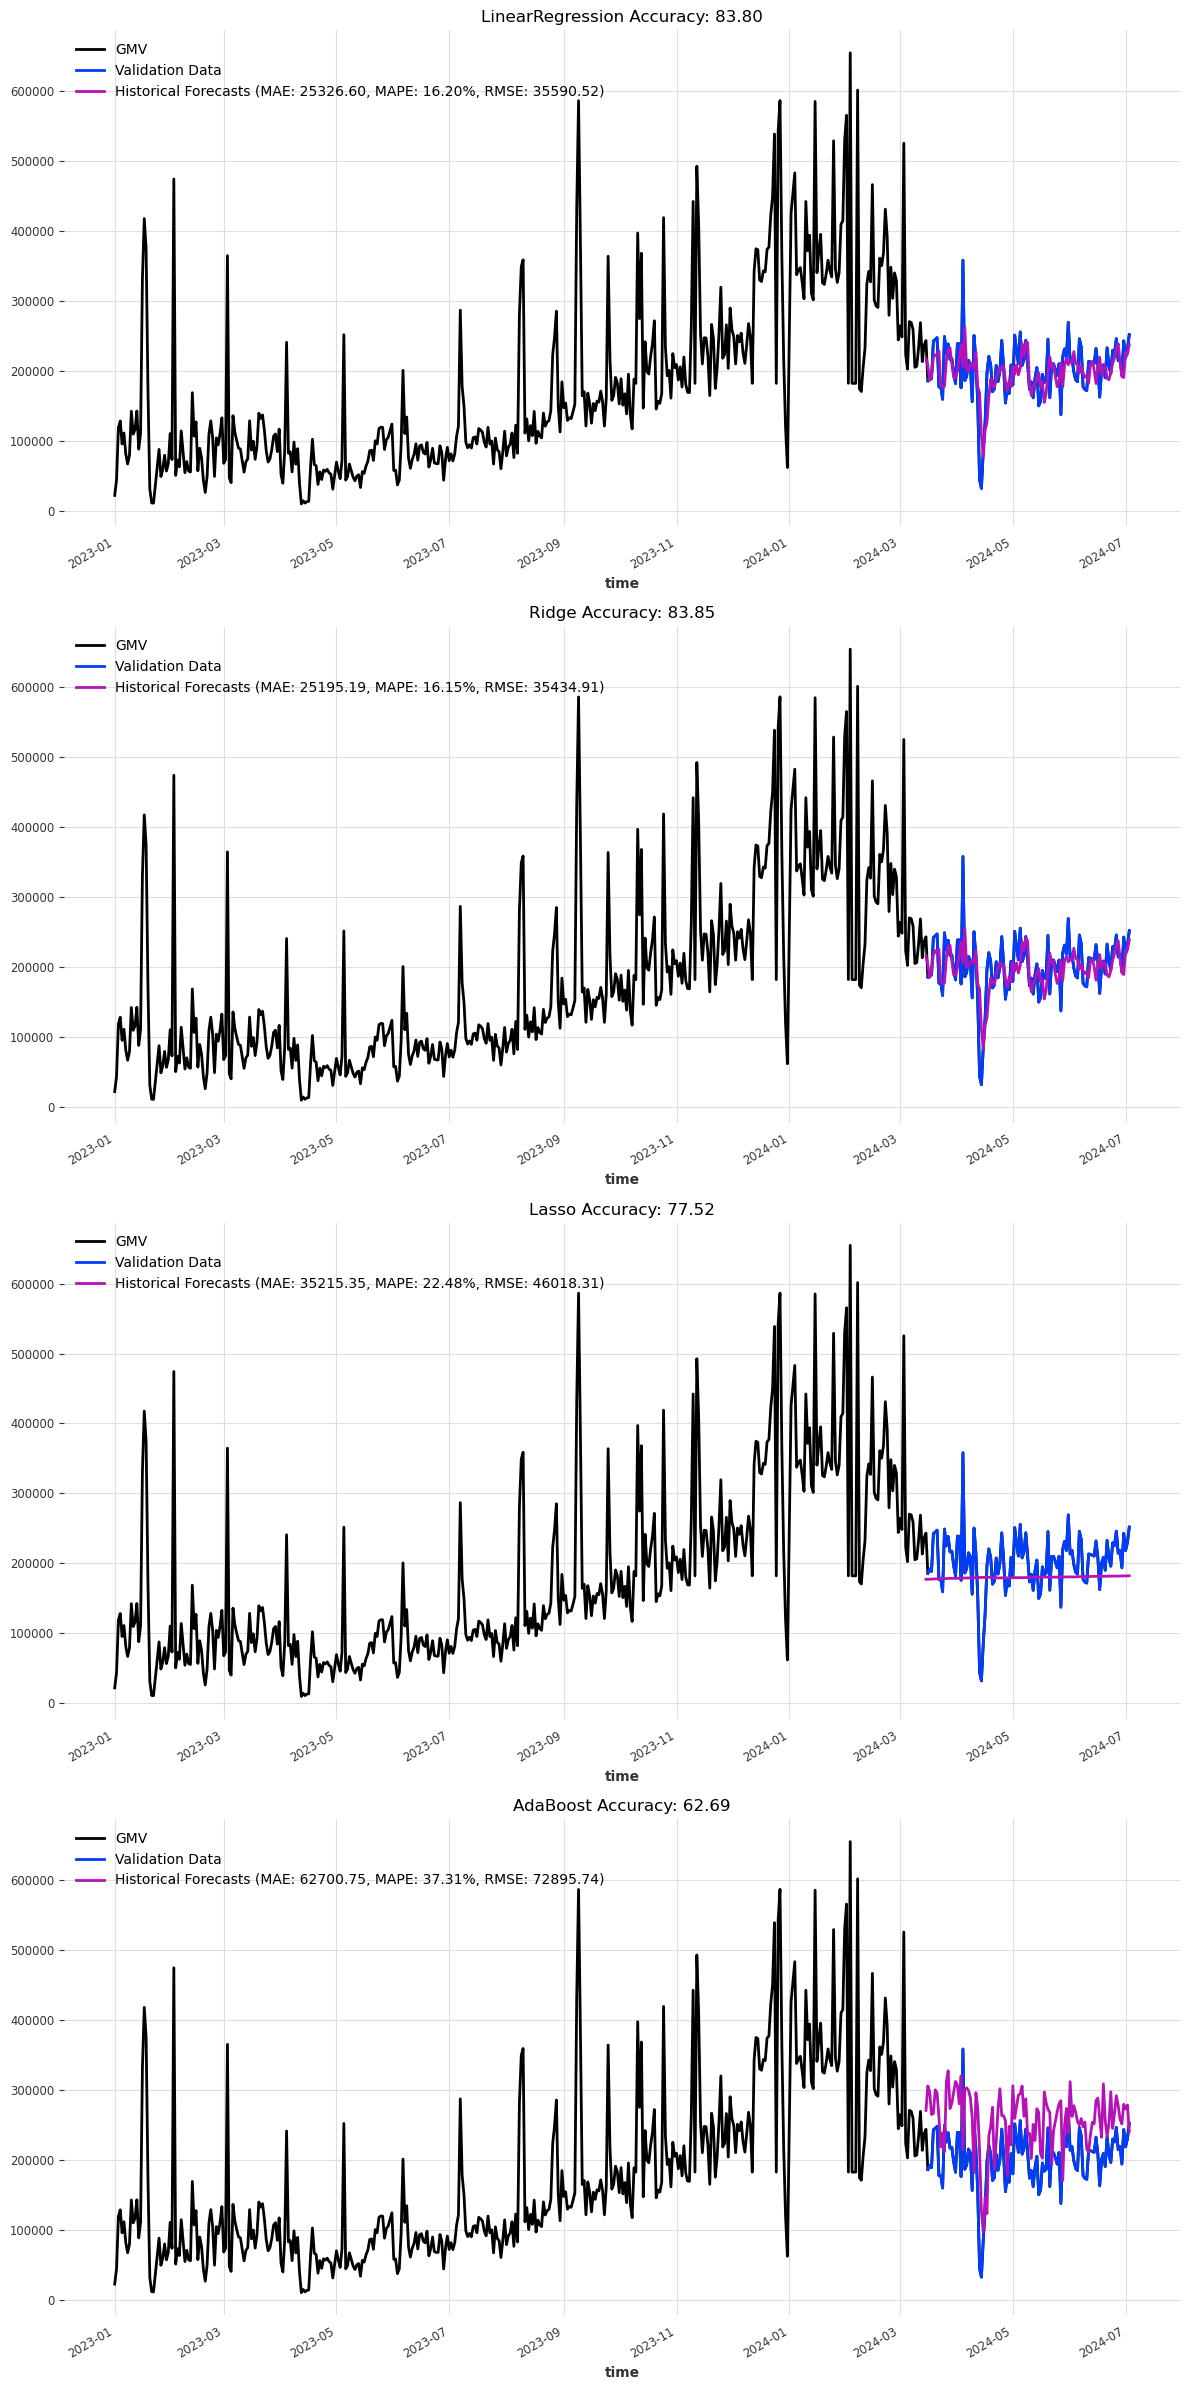

In [35]:
from sklearn.ensemble import RandomForestRegressor
from darts.models.forecasting.regression_model import RegressionModel
from darts.models.forecasting.random_forest import RandomForest
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor

# List of models configurations
models = [
    RegressionModel(model=linear_model.LinearRegression() ,lags=3, lags_future_covariates=(0,7),output_chunk_length=7,),
    RegressionModel(model=linear_model.Ridge(random_state=42) ,lags=3, lags_future_covariates=(0,7),output_chunk_length=7,),
    RegressionModel(model=linear_model.Lasso(random_state=42) ,lags=3, lags_future_covariates=(0,7),output_chunk_length=7,),
    RegressionModel(model=AdaBoostRegressor(random_state=42) ,lags=3, lags_future_covariates=(0,7),output_chunk_length=7,),
        ]
model_name = ['LinearRegression', 'Ridge', 'Lasso', 'AdaBoost']
i = 0

# Setting up the plot
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(12, 6 * len(models)))
if len(models) == 1:
    axes = [axes]  # Make axes iterable if there's only one model

# Loop through models and plot each one
for model, ax in zip(models, axes):
# Generate historical forecasts
    historical_forecasts = model.historical_forecasts(
        series=rescaled['gmv'],
        start=0.8,  # Start generating historical forecasts after 80% of the data
        forecast_horizon=1,  # Forecast horizon (number of steps to forecast)
        stride=1,  # Make a forecast every time step
        retrain=True,  # Retrain the model at each step
        verbose=True,
        future_covariates=future_cov
    )

    # last_known_gmv = df['gmv'].iloc[-1]

    original = scaler_gmv.inverse_transform(historical_forecasts['gmv'])
    # original = historical_forecasts['gmv_diff']
#     original = original.pd_dataframe().reset_index()
#     original.columns = ['date', 'gmv_diff']

#     original['gmv_diff'] = np.cumsum(original['gmv_diff']) + last_known_gmv

#     # Combine Date and Forecast into the final DataFrame
#     forecast_gmv = pd.DataFrame({
#         'date': original['date'],
#         'gmv': original['gmv_diff']
# })
#     forecast_gmv = TimeSeries.from_dataframe(forecast_gmv, time_col="date")

    # Calculate metrics
    hf_mae = mae(validation_ori['gmv'], original)
    hf_mape = mape(validation_ori['gmv'], original)
    hf_rmse = rmse(validation_ori['gmv'], original)

    # Plot the results
    # training['gmv_diff'].plot(label='Actual Data', ax=ax)
    data_ts['gmv'].plot(label='GMV', ax=ax)
    validation_ori['gmv'].plot(label='Validation Data', ax=ax)
    original.plot(label=f'Historical Forecasts (MAE: {hf_mae:.2f}, MAPE: {hf_mape:.2f}%, RMSE: {hf_rmse:.2f})', ax=ax)
    ax.legend()
    ax.set_title(f'{model_name[i]} Accuracy: {100-hf_mape:.2f}')
    i += 1
plt.tight_layout()
plt.show()


`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklear

  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklear

  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\guide\anaconda3\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklear

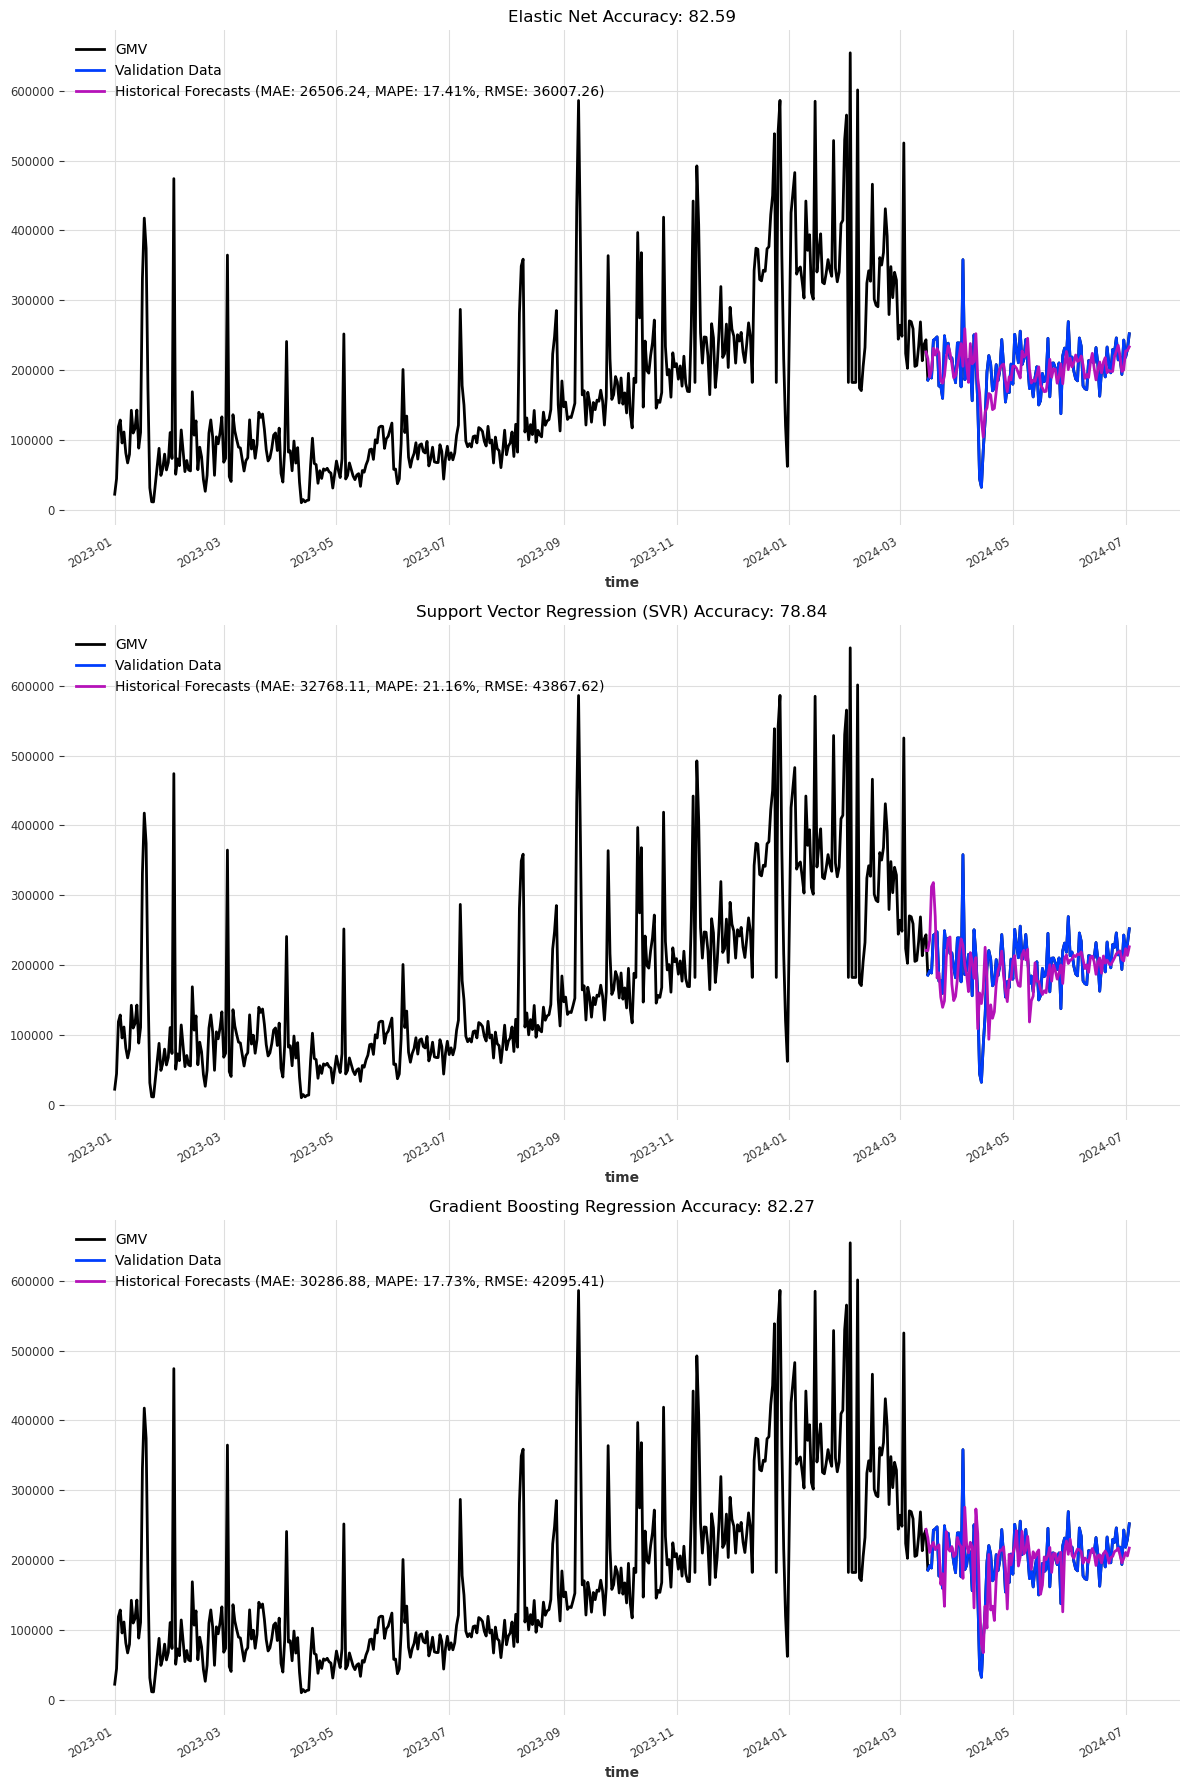

In [36]:
from darts.models.forecasting.catboost_model import CatBoostModel
from darts.models.forecasting.lgbm import LightGBMModel
from sklearn.ensemble import RandomForestRegressor
from darts.models.forecasting.regression_model import RegressionModel
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
from darts.models.forecasting.random_forest import RandomForest
from sklearn.linear_model import LinearRegression
from darts.models.forecasting.xgboost import XGBModel
from darts.utils.utils import ModelMode, SeasonalityMode
from darts.models.forecasting.arima import ARIMA
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(rescaled['gmv'].reshape)


# List of models configurations
models = [
    RegressionModel(model=ElasticNetCV(cv=5, random_state=42) ,lags=7, lags_future_covariates=(0,7),output_chunk_length=7,),
    RegressionModel(model=SVR() ,lags=7, lags_future_covariates=(0,7),output_chunk_length=7,),
    RegressionModel(model=GradientBoostingRegressor() ,lags=7, lags_future_covariates=(0,7),output_chunk_length=7,)
        ]
model_name = ['Elastic Net',
                # 'Polynomial Regression',
                'Support Vector Regression (SVR)',
                'Gradient Boosting Regression'
                  ]
i = 0

# Setting up the plot
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(12, 6 * len(models)))
if len(models) == 1:
    axes = [axes]  # Make axes iterable if there's only one model

# Loop through models and plot each one
for model, ax in zip(models, axes):
    # Generate historical forecasts
    historical_forecasts = model.historical_forecasts(
        series=rescaled['gmv'],
        start=0.8,  # Start generating historical forecasts after 80% of the data
        forecast_horizon=1,  # Forecast horizon (number of steps to forecast)
        stride=1,  # Make a forecast every time step
        retrain=True,  # Retrain the model at each step
        verbose=True,
        future_covariates=future_cov
    )

    # last_known_gmv = df['gmv'].iloc[-1]

    original = scaler_gmv.inverse_transform(historical_forecasts['gmv'])
    # original = historical_forecasts['gmv_diff']
#     original = original.pd_dataframe().reset_index()
#     original.columns = ['date', 'gmv_diff']

#     original['gmv_diff'] = np.cumsum(original['gmv_diff']) + last_known_gmv

#     # Combine Date and Forecast into the final DataFrame
#     forecast_gmv = pd.DataFrame({
#         'date': original['date'],
#         'gmv': original['gmv_diff']
# })
#     forecast_gmv = TimeSeries.from_dataframe(forecast_gmv, time_col="date")

    # Calculate metrics
    hf_mae = mae(validation_ori['gmv'], original)
    hf_mape = mape(validation_ori['gmv'], original)
    hf_rmse = rmse(validation_ori['gmv'], original)

    # Plot the results
    # training['gmv_diff'].plot(label='Actual Data', ax=ax)
    data_ts['gmv'].plot(label='GMV', ax=ax)
    validation_ori['gmv'].plot(label='Validation Data', ax=ax)
    original.plot(label=f'Historical Forecasts (MAE: {hf_mae:.2f}, MAPE: {hf_mape:.2f}%, RMSE: {hf_rmse:.2f})', ax=ax)
    ax.legend()
    ax.set_title(f'{model_name[i]} Accuracy: {100-hf_mape:.2f}')
    i += 1
plt.tight_layout()
plt.show()


In [37]:
from darts.models.forecasting.lgbm import LightGBMModel

model1= RegressionModel(model=linear_model.Ridge(random_state=42) ,lags=3, lags_future_covariates=(0,7),output_chunk_length=7)
model1.fit(rescaled['gmv'], future_covariates=future_cov)
forecast_diff = model1.predict(7, future_covariates=future_cov)
forecast_diff = scaler_gmv.inverse_transform(forecast_diff)

# For use GMV_diff 

# forecast_diff_df = forecast_diff.pd_dataframe().reset_index()
# forecast_diff_df.columns = ['Date', 'Forecast']

# Invert differencing to get the original GMV forecast
# last_known_gmv = df['gmv'].iloc[-1]
# forecast_diff_df['Forecast'] = np.cumsum(forecast_diff_df['Forecast']) + last_known_gmv

# Combine Date and Forecast into the final DataFrame
# forecast_gmv = pd.DataFrame({
#     'Date': forecast_diff_df['Date'],
#     'Forecast': forecast_diff_df['Forecast']
# })

# Display the forecasted GMV
# forecast_gmv
forecast_diff.pd_dataframe()

component             gmv
date                     
2024-07-04  239328.646587
2024-07-05  227074.926852
2024-07-06  207274.435991
2024-07-07  208727.149340
2024-07-08  218875.336773
2024-07-09  223163.930613
2024-07-10  234261.997703

## Save model

In [38]:
model.save("GMV_Weekly_Forecast_5_July.pkl")

In [ ]:
# from darts.models.forecasting.lgbm import LightGBMModel
# from darts.models.forecasting.catboost_model import CatBoostModel
# from sklearn.ensemble import RandomForestRegressor
# from darts.models.forecasting.regression_model import RegressionModel
# from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
# from darts.models.forecasting.linear_regression_model import LinearRegressionModel
# from darts.models.forecasting.random_forest import RandomForest
# from darts.models.forecasting.xgboost import XGBModel
# from darts.utils.utils import ModelMode, SeasonalityMode
# from sklearn.ensemble import RandomForestRegressor
# from darts.models.forecasting.arima import ARIMA
#LightGBM
# parameters = {
#     'lags': [1,3,7,14,21,28,30],
#     'lags_future_covariates': [(0,7)],
#     'output_chunk_length': [7],
#     'show_warnings': [False],
#     'verbose': [-1],
#     'likelihood':['quantile', 'poisson'],
#     'output_chunk_shift': [0,1,2,3]
# }

#RNDForest
# parameters = {
#     'lags': [1,2,3,7,14,21,30],
#     'lags_future_covariates': [(0,7)],
#     'output_chunk_length': [7],
#     'output_chunk_shift' : [0,1,3,5],
#     'max_depth': [3,5,7,9,11],
#     'n_estimators': [100,200, 300]
# }

#Catboost
# parameters = {
#     'lags': [7,14,21,28,30,31],
#     'lags_future_covariates': [(0,7)],
#     'output_chunk_length': [7]
# }

#XGBoost
# parameters = {
#     'lags': [3,7,14,21,28,30,31],
#     'lags_future_covariates': [(0,7)],
#     'output_chunk_length': [7],
#     'random_state': [42]
# } #Lags=14

# ExponentialSmoothing
# parameters = {
#     'trend': [ModelMode.ADDITIVE, ModelMode.NONE],
#     'seasonal': [SeasonalityMode.ADDITIVE, SeasonalityMode.NONE],
#     'seasonal_periods': [7],
#     'random_state': [42]
# } # ADDITIVE 40.86087049269774 |

#Regression
parameters = {
    'model': [linear_model.Ridge(random_state=42)
     ],
    'lags': [3,7,14,21,28,30,31],
    'lags_future_covariates': [(0,7)],
    'output_chunk_length': [7]
}

#ARIMA #{'p': 0, 'd': 0, 'q': 1}, #
# parameters = {
#     'p': [0],
#     'd':[0],
#     'q': [1],
#     'seasonal_order': [(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 2, 0, 12), (0, 2, 1, 12), (0, 2, 2, 12),
#  (1, 0, 0, 12), (1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 0, 12), (1, 2, 1, 12), (1, 2, 2, 12),
#  (2, 0, 0, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 0, 12), (2, 2, 1, 12), (2, 2, 2, 12)]

    # 'random_state': [42]
# }

best_param = RegressionModel.gridsearch(
    parameters=parameters,
    series=target,
    start=0.8,  # Start generating historical forecasts after 80% of the data
    forecast_horizon=7,  # Forecast horizon (number of steps to forecast)
    stride=7,  # Make a forecast every time step
    metric = mape,
    future_covariates=future_cov,
    reduction=np.mean,
    verbose=1,
    )
